# 場所概念の可視化
training dataのうち発話データがある場所の可視化  
学習した場所概念の平均と分散を表示


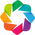

In [84]:
import glob
import os 
import shutil
import numpy as np
import pandas as pd
from operator import mul, add
from matplotlib import pyplot as plt
import IPython
import holoviews as hv
import re
hv.extension('bokeh')
%matplotlib inline

### 学習データの可視化

In [106]:
spatial_data_paht = "../../spco_formation/training_data/trial/"
spatial_result_paht = "../../spco_formation/result/trial/"

In [107]:
convert = lambda text: int(text) if text.isdigit() else text
alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
# file.sort(key = alphanum_key)

position_data_path = glob.glob(os.path.join(spatial_data_paht, "position_data/*"))
position_data_path.sort(key = alphanum_key)

In [108]:
position_list = [np.array([0,0])]
word_list = []
for i,data in enumerate(position_data_path):
    tmp_position = pd.read_csv(data ,header=None,delimiter=" ").iloc[0].values
    try:
        word_path = os.path.join(spatial_data_paht, "word/{}.txt".format(i))
        tmp_word = str(np.loadtxt(word_path,dtype=str))
    except:
        tmp_word = "non"
    position_list.append(tmp_position)
    word_list.append(tmp_word)
position_list = np.array(position_list)

In [109]:
position_name = pd.concat([ pd.DataFrame(position_list), pd.DataFrame(word_list) ],axis=1 )
position_name.columns = ["x","y","word"]
space_name = np.loadtxt("../../spco_formation/training_data/trial/space_name.txt",dtype=str)
# space_name = np.append(["non"],space_name)
position_name["data_id"] = range(len(position_name))
graph = [hv.Points(position_name[position_name.word==space],label=space) for space in space_name]

In [110]:
%%output size = 300
%%opts Points (color=Cycle('Category20') size=12 line_color="k" alpha=0.8) [tools=['hover'] ]
reduce(mul,graph)

:Overlay
   .Points.Cjk_unified_ideograph_5bdd_cjk_unified_ideograph_5ba4 :Points   [x,y]   (word,data_id)
   .Points.Katakana_ki_katakana_tu_katakana_ti_katakana_n        :Points   [x,y]   (word,data_id)
   .Points.Katakana_do_katakana_a_cjk_unified_ideograph_524d     :Points   [x,y]   (word,data_id)
   .Points.Cjk_unified_ideograph_98a8_cjk_unified_ideograph_5442 :Points   [x,y]   (word,data_id)

### 学習した場所概念を学習データにオーバーレイして表示

In [98]:
def make_graph(NUM):
    result_graph = []
    for j in range(NUM):
        spatial_result_paht = "../../spco_formation/result/trial_{0}/".format(j)

        convert = lambda text: int(text) if text.isdigit() else text
        alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
        tmp_data_path = glob.glob(os.path.join(spatial_result_paht, "word/*"))
        tmp_data_path.sort(key = alphanum_key)

        space_name_pd = pd.read_csv("../../spco_formation/training_data/trial/space_name.txt",header=None)
        space_name_pd.columns = ["word"]

        class_list = []
        for i in range(len(tmp_data_path)):
            value = pd.read_csv(tmp_data_path[i],header=None).iloc[0].values[0]
            if 0.25 != value:
                class_list.append(i)

        tmp_pose = position_name.iloc[0:1,:].copy()
        graph_2 = []
        for i in class_list:
            tmp_pose = position_name.iloc[0:1,:].copy()
            word = space_name_pd.iloc[np.argmax(pd.read_csv(tmp_data_path[i],header=None).values)][0]
            tmp_pose.word = "correct" + space_name_pd.iloc[np.argmax(pd.read_csv(tmp_data_path[i],header=None).values)][0]
            tmp_pose.x = np.loadtxt("../../spco_formation/result/trial_{0}/mu/gauss_mu{1}.csv".format(j,i),dtype=np.float64)[0]
            tmp_pose.y = np.loadtxt("../../spco_formation/result/trial_{0}/mu/gauss_mu{1}.csv".format(j,i),dtype=np.float64)[1]

            x = np.loadtxt("../../spco_formation/result/trial_{0}/mu/gauss_mu{1}.csv".format(j,i),dtype=np.float64)[0]
            y = np.loadtxt("../../spco_formation/result/trial_{0}/mu/gauss_mu{1}.csv".format(j,i),dtype=np.float64)[1]

            vx = np.loadtxt("../../spco_formation/result/trial_{0}/sigma/gauss_sgima{1}.csv".format(j,i),dtype=np.float64)[0][0]
            vy = np.loadtxt("../../spco_formation/result/trial_{0}/sigma/gauss_sgima{1}.csv".format(j,i),dtype=np.float64)[1][1] 


            tmp_pose.data_id = i
            graph_2.append(hv.Points(tmp_pose,label="concept {}".format(word)))
            graph_2.append(hv.Ellipse(x,y,(vx,vy)))
        result_graph.append(graph_2)
    return result_graph

In [111]:
%%output size=100
%%opts Ellipse (line_width=3)
%%opts Points (color=Cycle('Category20') size=12 line_color="k" alpha=0.8) [tools=['hover'] legend_position="top" ]

NUM = 14
result_graph = make_graph(NUM)
reduce(add,[(reduce(mul,graph) * reduce(mul,result_graph[i])).relabel(str(i)) for i in range(NUM)]).cols(3)

:Layout
   .Overlay.A_0  :Overlay
      .Points.Cjk_unified_ideograph_5bdd_cjk_unified_ideograph_5ba4             :Points   [x,y]   (word,data_id)
      .Points.Katakana_ki_katakana_tu_katakana_ti_katakana_n                    :Points   [x,y]   (word,data_id)
      .Points.Katakana_do_katakana_a_cjk_unified_ideograph_524d                 :Points   [x,y]   (word,data_id)
      .Points.Cjk_unified_ideograph_98a8_cjk_unified_ideograph_5442             :Points   [x,y]   (word,data_id)
      .Points.Concept_katakana_do_katakana_a_cjk_unified_ideograph_524d.I       :Points   [x,y]   (word,data_id)
      .Ellipse.I                                                                :Ellipse   [x,y]
      .Points.Concept_cjk_unified_ideograph_98a8_cjk_unified_ideograph_5442.I   :Points   [x,y]   (word,data_id)
      .Ellipse.II                                                               :Ellipse   [x,y]
      .Points.Concept_katakana_do_katakana_a_cjk_unified_ideograph_524d.II      :Points   [x,y]   (word,data_id)
      .Ellipse.III                                                              :Ellipse   [x,y]
      .Points.Concept_katakana_do_katakana_a_cjk_unified_ideograph_524d.III     :Points   [x,y]   (word,data_id)
      .Ellipse.IV                                                               :Ellipse   [x,y]
      .Points.Concept_cjk_unified_ideograph_5bdd_cjk_unified_ideograph_5ba4     :Points   [x,y]   (word,data_id)
      .Ellipse.V                                                                :Ellipse   [x,y]
      .Points.Concept_cjk_unified_ideograph_98a8_cjk_unified_ideograph_5442.II  :Points   [x,y]   (word,data_id)
      .Ellipse.VI                                                               :Ellipse   [x,y]
      .Points.Concept_katakana_ki_katakana_tu_katakana_ti_katakana_n.I          :Points   [x,y]   (word,data_id)
      .Ellipse.VII                                                              :Ellipse   [x,y]
      .Points.Concept_cjk_unified_ideograph_98a8_cjk_unified_ideograph_5442.III :Points   [x,y]   (word,data_id)
      .Ellipse.VIII                                                             :Ellipse   [x,y]
      .Points.Concept_katakana_ki_katakana_tu_katakana_ti_katakana_n.II         :Points   [x,y]   (word,data_id)
      .Ellipse.IX                                                               :Ellipse   [x,y]
   .Overlay.A_1  :Overlay
      .Points.Cjk_unified_ideograph_5bdd_cjk_unified_ideograph_5ba4            :Points   [x,y]   (word,data_id)
      .Points.Katakana_ki_katakana_tu_katakana_ti_katakana_n                   :Points   [x,y]   (word,data_id)
      .Points.Katakana_do_katakana_a_cjk_unified_ideograph_524d                :Points   [x,y]   (word,data_id)
      .Points.Cjk_unified_ideograph_98a8_cjk_unified_ideograph_5442            :Points   [x,y]   (word,data_id)
      .Points.Concept_cjk_unified_ideograph_5bdd_cjk_unified_ideograph_5ba4    :Points   [x,y]   (word,data_id)
      .Ellipse.I                                                               :Ellipse   [x,y]
      .Points.Concept_cjk_unified_ideograph_98a8_cjk_unified_ideograph_5442.I  :Points   [x,y]   (word,data_id)
      .Ellipse.II                                                              :Ellipse   [x,y]
      .Points.Concept_katakana_do_katakana_a_cjk_unified_ideograph_524d        :Points   [x,y]   (word,data_id)
      .Ellipse.III                                                             :Ellipse   [x,y]
      .Points.Concept_cjk_unified_ideograph_98a8_cjk_unified_ideograph_5442.II :Points   [x,y]   (word,data_id)
      .Ellipse.IV                                                              :Ellipse   [x,y]
   .Overlay.A_2  :Overlay
      .Points.Cjk_unified_ideograph_5bdd_cjk_unified_ideograph_5ba4            :Points   [x,y]   (word,data_id)
      .Points.Katakana_ki_katakana_tu_katakana_ti_katakana_n                   :Points   [x,y]   (word,data_id)
      .Points.Katakana_do_katakana_a_cjk_unified_ideograph_524d     